<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#What-is-backtesting-or-hindcasting?" data-toc-modified-id="What-is-backtesting-or-hindcasting?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is backtesting or hindcasting?</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Import-dataset" data-toc-modified-id="Import-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Import dataset</a></span></li><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train-test split</a></span></li><li><span><a href="#Multiple-Train-Test-Splits" data-toc-modified-id="Multiple-Train-Test-Splits-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Multiple Train-Test Splits</a></span></li><li><span><a href="#Walk-Forward-Validation" data-toc-modified-id="Walk-Forward-Validation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Walk Forward Validation</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-block alert-warning">
<font color=black>

**What?** How to valdate (backtesting) models for time series forecasting

</font>
</div>

# What is backtesting or hindcasting? 
<hr style="border:2px solid black"> </hr>

<div class="alert alert-block alert-info">
<font color=black>

- **Goal?** Make accurate predictions about the future. 
- **What is backtesting or hindcasting?** In the field of time series forecasting it is the evaluation of machine learning models on time series data.
- **What is an important difference?** Train-test splits and k-fold cross-validation do not work in the case of time series data because they assume that there is no relationship between the observations. This is not true of time series data, where the time dimension of observations means that we cannot randomly split them into groups. Instead, we must split data up and respect the temporal order in which values were observed. 


- **What options do we have?**
    - Train-test split
    - Multiple Train-Test Splits
    - Walk Forward Validation

</font>
</div>

# Imports
<hr style="border:2px solid black"> </hr>

In [54]:
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings("ignore")

# Import dataset
<hr style="border:2px solid black"> </hr>

In [28]:
# Load sunspot data
series = read_csv('../../DATASETS/sunspots3.csv', header=0, index_col=0)

In [29]:
print(series.head(5))
print(series.shape)

         Sunspots
Month            
1749-01      58.0
1749-02      62.6
1749-03      70.0
1749-04      55.7
1749-05      85.0
(2820, 1)


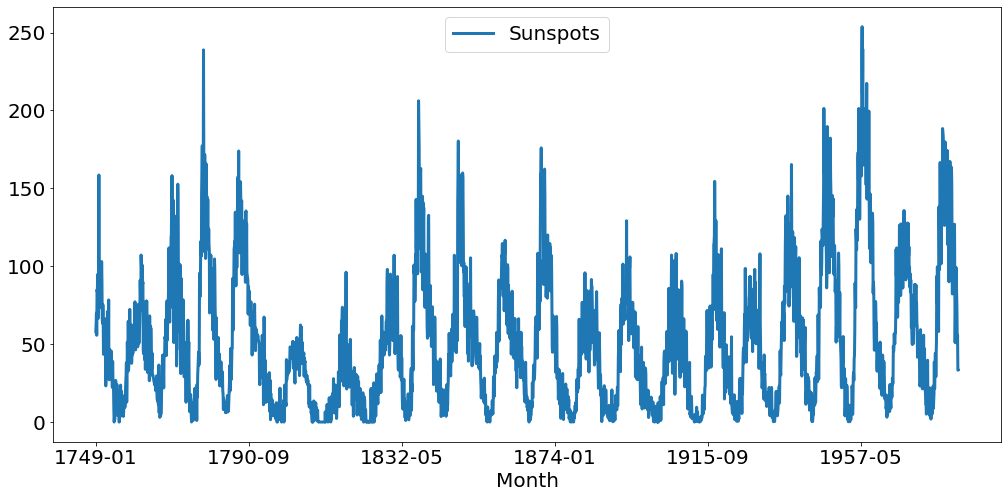

In [33]:
rcParams['figure.figsize'] = 17, 8
rcParams['font.size'] = 20
series.plot(lw = 3)
pyplot.show()

# Train-test split
<hr style="border:2px solid black"> </hr>

<div class="alert alert-block alert-info">
<font color=black>

- It is useful when you have a large amount of data so that **both** training and tests sets are **representative** of the original problem. 
- This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets. 
- Depending on the amount of data you have available and the amount of data required, you can use splits of 50-50, 70-30 and 90-10.

</font>
</div>

In [35]:
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 2820
Training Observations: 1861
Testing Observations: 959


Observations: 2820
Training Observations: 2115
Testing Observations: 705


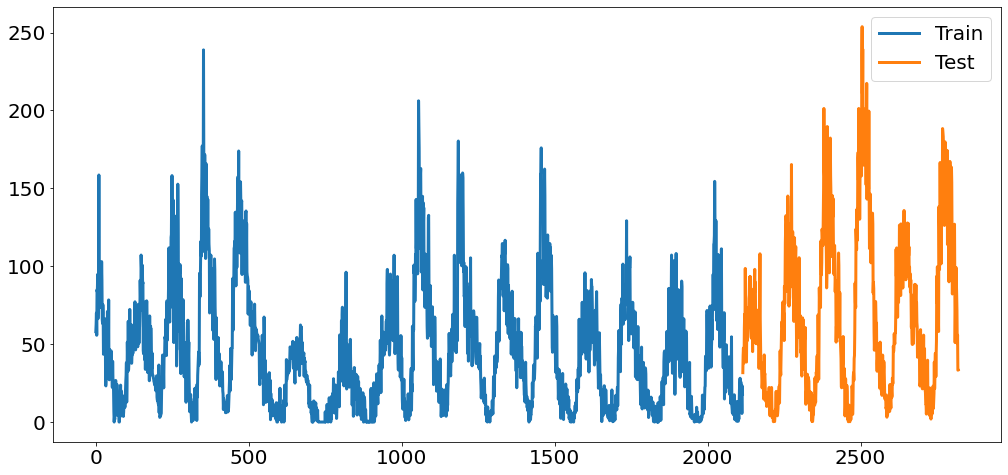

In [55]:
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
plt.plot(train, lw =3, label = "Train")
plt.plot([None for i in train] + [x for x in test], lw = 3, label = "Test")
plt.legend()
plt.show()

# Multiple Train-Test Splits
<hr style="border:2px solid black"> </hr>

<div class="alert alert-block alert-info">
<font color=black>

- Multiple Train-Test Splits: we can repeat the process of splitting the time series into train and test sets multiple times. 
- Using multiple train-test splits will result in more models being trained, and in turn, a more accurate estimate of the performance of the models on unseen data. 
- A limitation of the train-test split approach is that the trained models remain fixed as they are evaluated on each evaluation in the test set. 
- This may not be realistic as models can be retrained as new daily or monthly observations are made available. This parituclar issue is addressed in the **walk forward validation**. 


</font>
</div>

In [44]:
splits = TimeSeriesSplit(n_splits=3)

In [52]:
# Please keep in mif=nf that the test set is not the same!
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    print("*************************")

Observations: 1410
Training Observations: 705
Testing Observations: 705
*************************
Observations: 2115
Training Observations: 1410
Testing Observations: 705
*************************
Observations: 2820
Training Observations: 2115
Testing Observations: 705
*************************


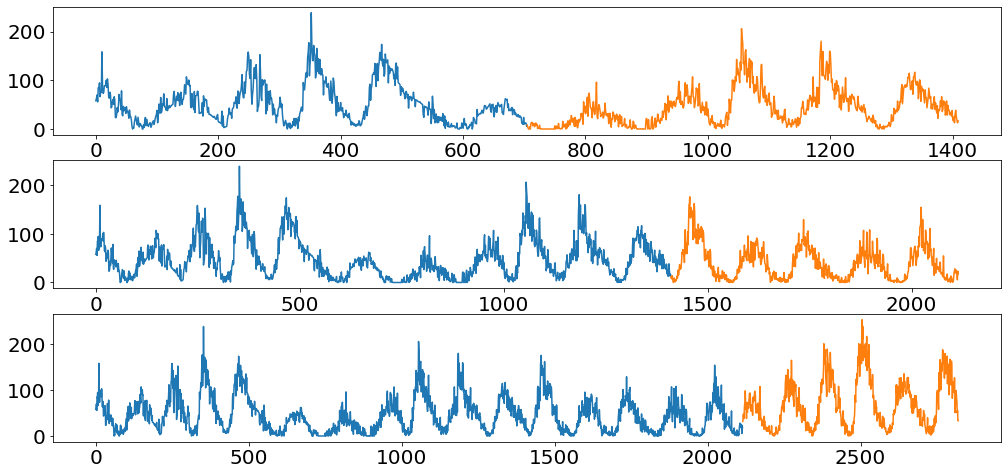

In [56]:
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    pyplot.subplot(310 + index)
    pyplot.plot(train)
    pyplot.plot([None for i in train] + [x for x in test])
    index += 1
pyplot.show()

# Walk Forward Validation
<hr style="border:2px solid black"> </hr>

<div class="alert alert-block alert-info">
<font color=black>

- It is called like this because this methodology involves moving along the time series one-time step at a time. Additionally, because a sliding or expanding window is used to train a model, this method is also referred to as **Rolling Window Analysis** or a **Rolling Forecast**. You can see that many more models are created. 
- This has the benefit again of providing a much more robust estimation of how the chosen modelling method and parameters will perform in practice.  
- This improved estimate comes at the computational cost of creating so many models. This is not expensive if the modelling method is simple or dataset is small, but could be an issue at scale.  Walk-forward validation is the gold standard of model evaluation. It is the k-fold cross-validation for time series. 
- Essentially a model may be updated each time step new data is received.

</font>
</div>

<div class="alert alert-block alert-info">
<font color=black>

- Implementation:
    - The minimum number of samples in the window is used to train a model.
    - The model makes a prediction for the next time step.
    - The prediction is stored or evaluated against the known value.
    - The window is expanded to include the known value and the process is repeated

</font>
</div>

In [58]:
X = series.values
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print('No train=%d, No test=%d' % (len(train), len(test)))

No train=500, No test=1
No train=501, No test=1
No train=502, No test=1
No train=503, No test=1
No train=504, No test=1
No train=505, No test=1
No train=506, No test=1
No train=507, No test=1
No train=508, No test=1
No train=509, No test=1
No train=510, No test=1
No train=511, No test=1
No train=512, No test=1
No train=513, No test=1
No train=514, No test=1
No train=515, No test=1
No train=516, No test=1
No train=517, No test=1
No train=518, No test=1
No train=519, No test=1
No train=520, No test=1
No train=521, No test=1
No train=522, No test=1
No train=523, No test=1
No train=524, No test=1
No train=525, No test=1
No train=526, No test=1
No train=527, No test=1
No train=528, No test=1
No train=529, No test=1
No train=530, No test=1
No train=531, No test=1
No train=532, No test=1
No train=533, No test=1
No train=534, No test=1
No train=535, No test=1
No train=536, No test=1
No train=537, No test=1
No train=538, No test=1
No train=539, No test=1
No train=540, No test=1
No train=541, No

No train=2195, No test=1
No train=2196, No test=1
No train=2197, No test=1
No train=2198, No test=1
No train=2199, No test=1
No train=2200, No test=1
No train=2201, No test=1
No train=2202, No test=1
No train=2203, No test=1
No train=2204, No test=1
No train=2205, No test=1
No train=2206, No test=1
No train=2207, No test=1
No train=2208, No test=1
No train=2209, No test=1
No train=2210, No test=1
No train=2211, No test=1
No train=2212, No test=1
No train=2213, No test=1
No train=2214, No test=1
No train=2215, No test=1
No train=2216, No test=1
No train=2217, No test=1
No train=2218, No test=1
No train=2219, No test=1
No train=2220, No test=1
No train=2221, No test=1
No train=2222, No test=1
No train=2223, No test=1
No train=2224, No test=1
No train=2225, No test=1
No train=2226, No test=1
No train=2227, No test=1
No train=2228, No test=1
No train=2229, No test=1
No train=2230, No test=1
No train=2231, No test=1
No train=2232, No test=1
No train=2233, No test=1
No train=2234, No test=1


# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-block alert-warning">
<font color=black>

- https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/
- [Donwload dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv)

</font>
</div>